In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime 

In [9]:
# df_tesla=pdr.get_data_yahoo('TSLA')
# df

In [10]:
# import pandas_datareader as pdr
# from datetime import datetime

# start_date = datetime(2020, 1, 1)
# end_date = datetime(2022, 1, 1)

# df_tesla = pdr.get_data_yahoo('TSLA', start=start_date, end=end_date)

In [2]:
import yfinance as yf

df_tesla = yf.download('TSLA',start='2017-02-27')  # Download data for the last day (adjust as needed)
df_tesla.head()  # Display the first few rows of the data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


In [13]:
## Simple moving average

<Axes: xlabel='Date'>

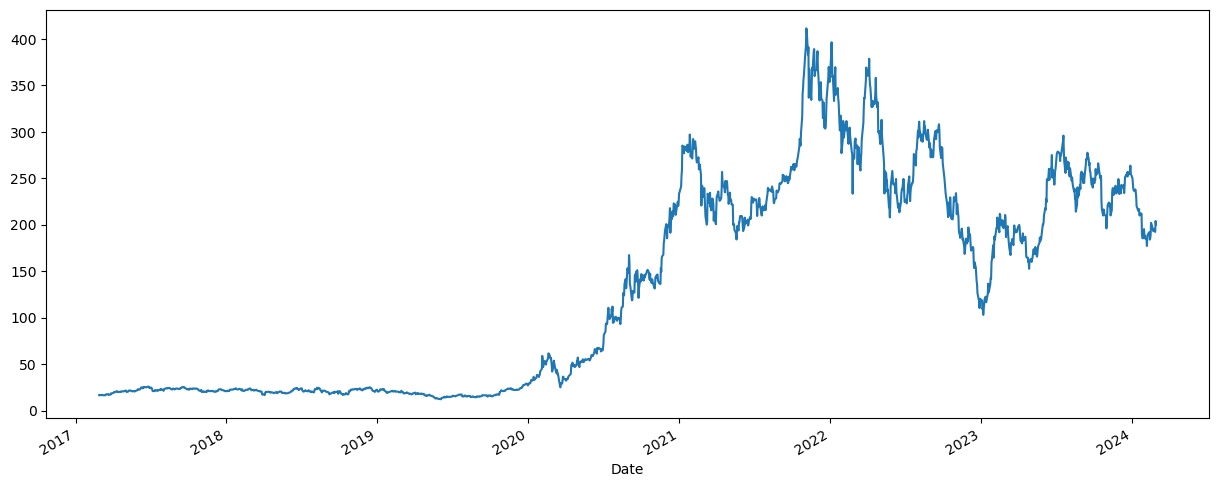

In [3]:
df_tesla['Open'].plot(figsize=(15,6))

In [4]:
df_tesla['Open:10 days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='Date'>

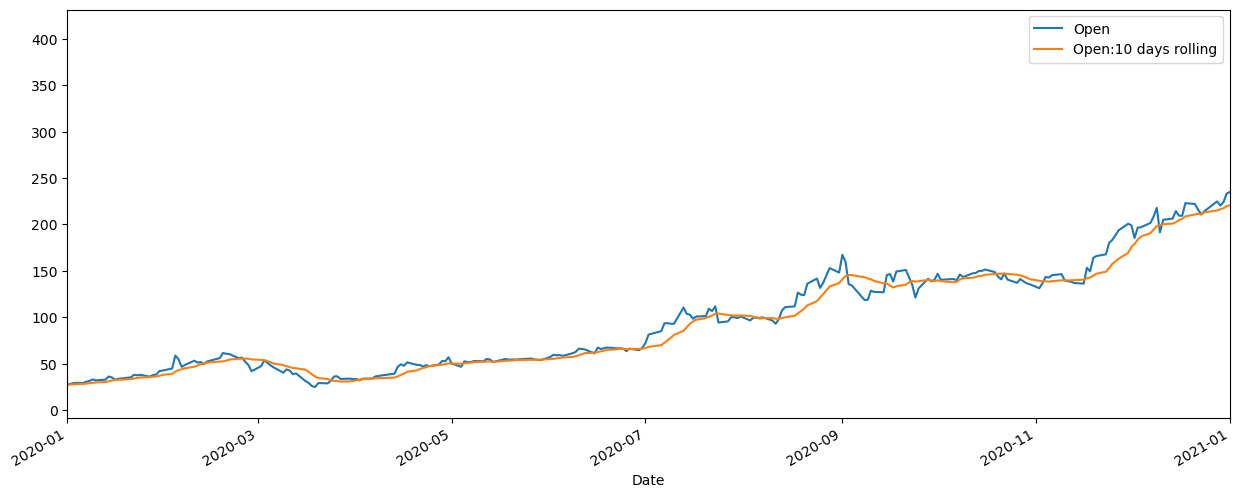

In [5]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))
# specigy x limit so that we see more clearly 'Open:10 days rolling

In [6]:
df_tesla['Open:20 days rolling']=df_tesla['Open'].rolling(window=20,min_periods=1).mean()
df_tesla['Open:50 days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

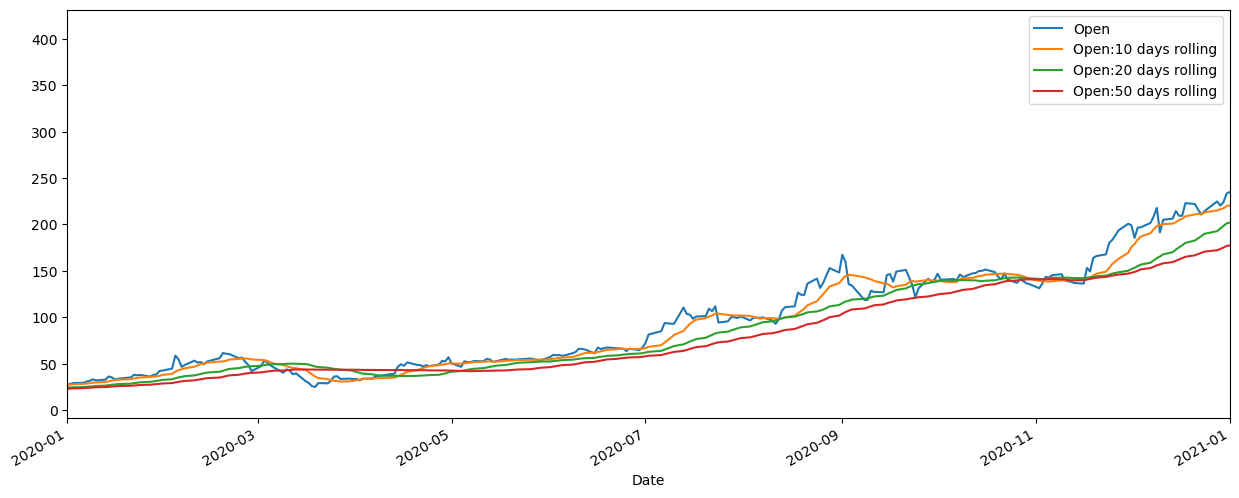

In [7]:
df_tesla[['Open','Open:10 days rolling','Open:20 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

<Axes: xlabel='Date'>

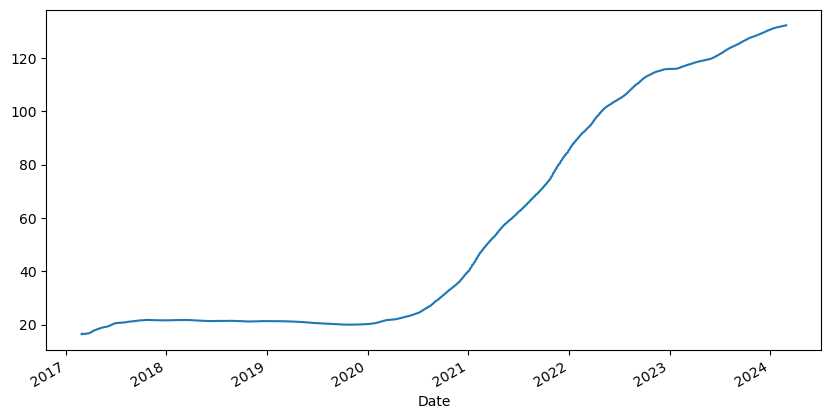

In [13]:
## Expanding function
## Cumilative Moving Average
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [14]:
## EMA - Exponential Moving Average


In [15]:
## EMA Tesla shares
## Lets smoothing factor - 0.1
# ewm is function of EMA
# alpha is smoothning factor
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1 , adjust=False).mean()

##### When adjust=False, the exponential weights are not adjusted based on the sample size. This means that the EMA calculation gives more weight to recent observations without considering the impact of initial periods on the weight distribution

<Axes: xlabel='Date'>

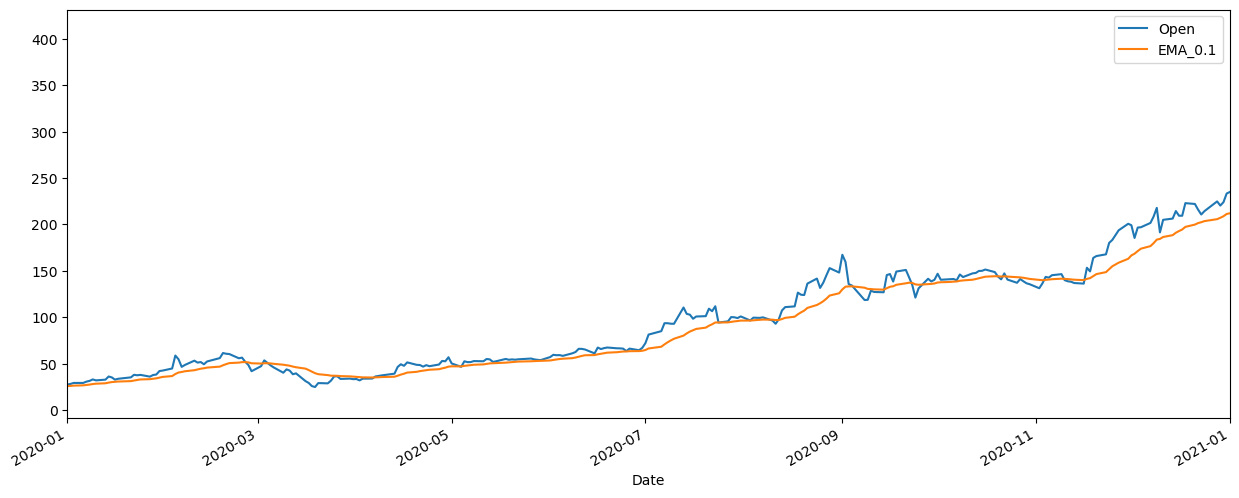

In [16]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))
# we can see graph from starting without lags as in previous

In [17]:
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3 , adjust=False).mean()

<Axes: xlabel='Date'>

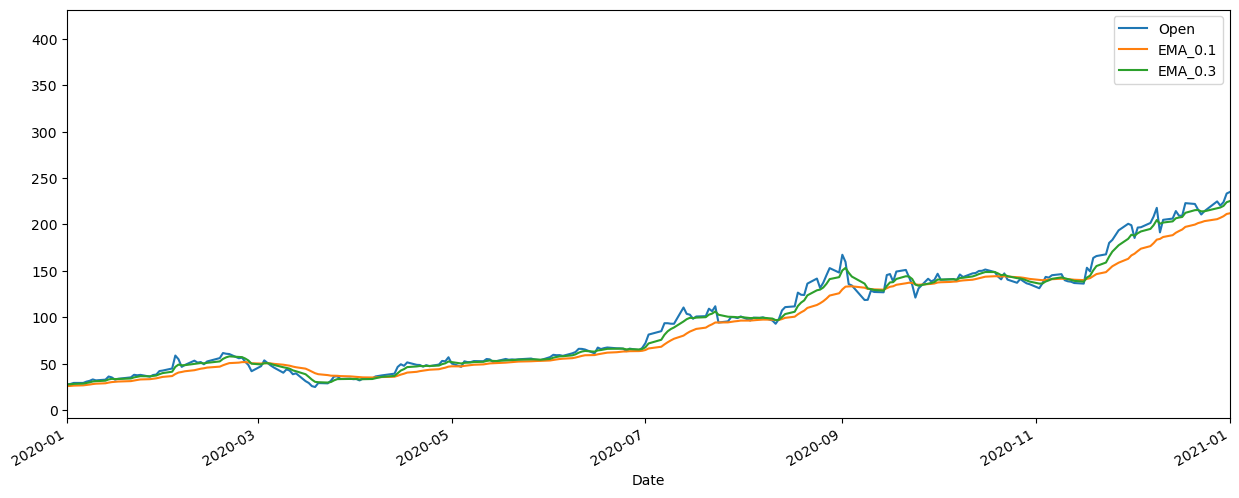

In [18]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))
# 0.3 better than 0.1 as more close

In [19]:
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()
# span is doing the work o ewma

<Axes: xlabel='Date'>

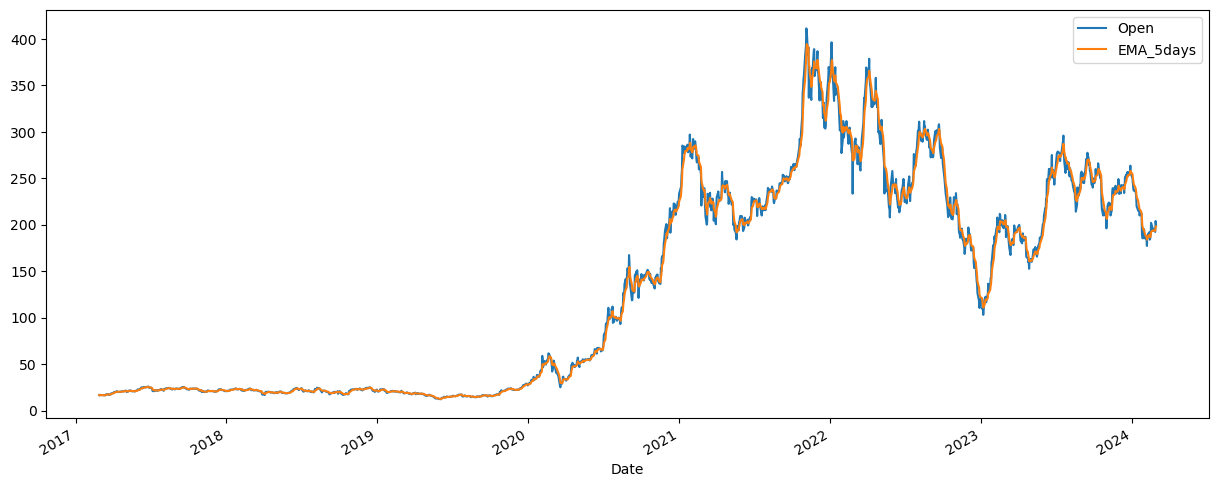

In [20]:
df_tesla[['Open','EMA_5days']].plot(figsize=(15,6))

<Axes: xlabel='Date'>

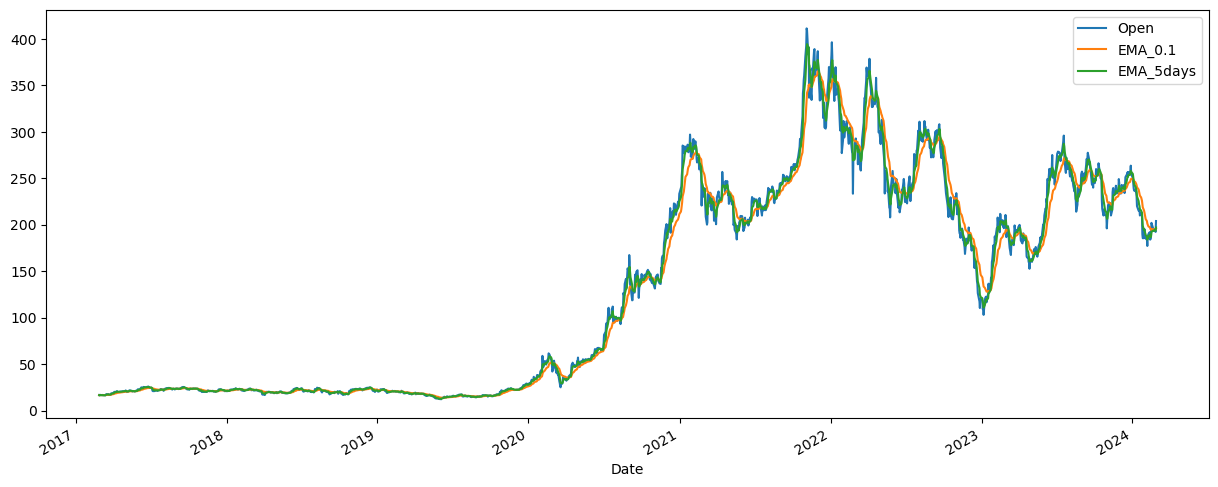

In [35]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(figsize=(15,6))

In [36]:
# ewma is best for smoothning of the curve

In [21]:
## go to theory